<a href="https://colab.research.google.com/github/xuebingwu/SplicingLab/blob/main/scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color='MediumSlateBlue '> **Splicing^Lab**  </font> 
## A Colab notebook for predicting 5' and 3' splice sites from a single sequence
---
[Xuebing Wu lab @ Columbia](https://xuebingwu.github.io/)     |     [GitHub repository](https://github.com/xuebingwu/splice-site-prediction-with-pangolin) 




OUTPUT


2023-05-09 16:05:16: Input sequence length = 786
2023-05-09 16:05:16: Loading models
2023-05-09 16:05:16: Scoring sites: + strand
2023-05-09 16:05:19: Filtering sites: + strand
3 splice sites found on the + strand with SCORE_CUTOFF = 0.2
2023-05-09 16:05:19: Saving to file: + strand


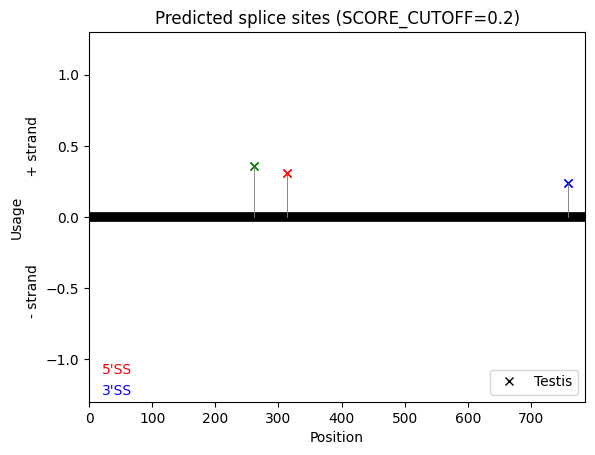


---------------------------------
#Predicted splice sites
#Options: SCORE_TYPE=Usage, SCORE_CUTOFF=0.2
#Columns info:
#1 - Position: site position in the sequence
#2 - Sequence: 20-nt junction sequence. Intron-lower case; Exon-upper case
#3 - Strand: strand of the site
#4 - Type: 5' splice site (5'SS), 3' splice site (3'SS), or Undetermined, or Noncanonical
#5-8 - Scores: site usage or P(splice) in each tissue

Position	Sequence	Strand	Type	Testis
261	TTCCTTACAGGGTTTTAGAC	+	Undetermined	0.36
314	TAAATTAAGGAgtaagtctg	+	5'SS	0.306
759	tcatttgcagGAAATGCTGG	+	3'SS	0.239


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
##@title Analyze your sequence

# scripts from custom_usage.py from the Pangolin package

import os
from matplotlib import pylab
import matplotlib.lines as mlines
from google.colab import files
import datetime
import re


class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

########## input 
INPUT = "SMN2 exon 7"#@param ["ACTB pre-mRNA", "GAPDH pre-mRNA", "EGFP + CENPB 3' UTR reporter","SMN2 exon 7"] {allow-input: true}
#INPUT = "Paste your sequence or select a sample sequence (default: ACTB pre-mRNA)"#@param ["ACTB pre-mRNA", "GAPDH pre-mRNA", "EGFP + CENPB 3' UTR reporter"] {allow-input: true}

#@markdown - To run: click `Runtime` -> `Run all` in the menu bar, or click the triangle play/run button on the left
#@markdown - Input format: raw sequence (A/C/G/T/U only); space allowed
#@markdown - Example: copy & paste a multi-line sequence from a FASTA file (without the header), or entire plasmid sequence from Snapgene or Benchling 

seq = INPUT

if seq == "ACTB pre-mRNA":
  seq = "CGAGACCGCGTCCGCCCCGCGAGCACAGAGCCTCGCCTTTGCCGATCCGCCGCCCGTCCACACCCGCCGCCAGGTAAGCCCGGCCAGCCGACCGGGGCAGGCGGCTCACGGCCCGGCCGCAGGCGGCCGCGGCCCCTTCGCCCGTGCAGAGCCGCCGTCTGGGCCGCAGCGGGGGGCGCATGGGGGGGGAACCGGACCGCCGTGGGGGGCGCGGGAGAAGCCCCTGGGCCTCCGGAGATGGGGGACACCCCACGCCAGTTCGGAGGCGCGAGGCCGCGCTCGGGAGGCGCGCTCCGGGGGTGCCGCTCTCGGGGCGGGGGCAACCGGCGGGGTCTTTGTCTGAGCCGGGCTCTTGCCAATGGGGATCGCAGGGTGGGCGCGGCGGAGCCCCCGCCAGGCCCGGTGGGGGCTGGGGCGCCATTGCGCGTGCGCGCTGGTCCTTTGGGCGCTAACTGCGTGCGCGCTGGGAATTGGCGCTAATTGCGCGTGCGCGCTGGGACTCAAGGCGCTAACTGCGCGTGCGTTCTGGGGCCCGGGGTGCCGCGGCCTGGGCTGGGGCGAAGGCGGGCTCGGCCGGAAGGGGTGGGGTCGCCGCGGCTCCCGGGCGCTTGCGCGCACTTCCTGCCCGAGCCGCTGGCCGCCCGAGGGTGTGGCCGCTGCGTGCGCGCGCGCCGACCCGGCGCTGTTTGAACCGGGCGGAGGCGGGGCTGGCGCCCGGTTGGGAGGGGGTTGGGGCCTGGCTTCCTGCCGCGCGCCGCGGGGACGCCTCCGACCAGTGTTTGCCTTTTATGGTAATAACGCGGCCGGCCCGGCTTCCTTTGTCCCCAATCTGGGCGCGCGCCGGCGCCCCCTGGCGGCCTAAGGACTCGGCGCGCCGGAAGTGGCCAGGGCGGGGGCGACCTCGGCTCACAGCGCGCCCGGCTATTCTCGCAGCTCACCATGGATGATGATATCGCCGCGCTCGTCGTCGACAACGGCTCCGGCATGTGCAAGGCCGGCTTCGCGGGCGACGATGCCCCCCGGGCCGTCTTCCCCTCCATCGTGGGGCGCCCCAGGCACCAGGTAGGGGAGCTGGCTGGGTGGGGCAGCCCCGGGAGCGGGCGGGAGGCAAGGGCGCTTTCTCTGCACAGGAGCCTCCCGGTTTCCGGGGTGGGGGCTGCGCCCGTGCTCAGGGCTTCTTGTCCTTTCCTTCCCAGGGCGTGATGGTGGGCATGGGTCAGAAGGATTCCTATGTGGGCGACGAGGCCCAGAGCAAGAGAGGCATCCTCACCCTGAAGTACCCCATCGAGCACGGCATCGTCACCAACTGGGACGACATGGAGAAAATCTGGCACCACACCTTCTACAATGAGCTGCGTGTGGCTCCCGAGGAGCACCCCGTGCTGCTGACCGAGGCCCCCCTGAACCCCAAGGCCAACCGCGAGAAGATGACCCAGGTGAGTGGCCCGCTACCTCTTCTGGTGGCCGCCTCCCTCCTTCCTGGCCTCCCGGAGCTGCGCCCTTTCTCACTGGTTCTCTCTTCTGCCGTTTTCCGTAGGACTCTCTTCTCTGACCTGAGTCTCCTTTGGAACTCTGCAGGTTCTATTTGCTTTTTCCCAGATGAGCTCTTTTTCTGGTGTTTGTCTCTCTGACTAGGTGTCTAAGACAGTGTTGTGGGTGTAGGTACTAACACTGGCTCGTGTGACAAGGCCATGAGGCTGGTGTAAAGCGGCCTTGGAGTGTGTATTAAGTAGGTGCACAGTAGGTCTGAACAGACTCCCCATCCCAAGACCCCAGCACACTTAGCCGTGTTCTTTGCACTTTCTGCATGTCCCCCGTCTGGCCTGGCTGTCCCCAGTGGCTTCCCCAGTGTGACATGGTGTATCTCTGCCTTACAGATCATGTTTGAGACCTTCAACACCCCAGCCATGTACGTTGCTATCCAGGCTGTGCTATCCCTGTACGCCTCTGGCCGTACCACTGGCATCGTGATGGACTCCGGTGACGGGGTCACCCACACTGTGCCCATCTACGAGGGGTATGCCCTCCCCCATGCCATCCTGCGTCTGGACCTGGCTGGCCGGGACCTGACTGACTACCTCATGAAGATCCTCACCGAGCGCGGCTACAGCTTCACCACCACGGCCGAGCGGGAAATCGTGCGTGACATTAAGGAGAAGCTGTGCTACGTCGCCCTGGACTTCGAGCAAGAGATGGCCACGGCTGCTTCCAGCTCCTCCCTGGAGAAGAGCTACGAGCTGCCTGACGGCCAGGTCATCACCATTGGCAATGAGCGGTTCCGCTGCCCTGAGGCACTCTTCCAGCCTTCCTTCCTGGGTGAGTGGAGACTGTCTCCCGGCTCTGCCTGACATGAGGGTTACCCCTCGGGGCTGTGCTGTGGAAGCTAAGTCCTGCCCTCATTTCCCTCTCAGGCATGGAGTCCTGTGGCATCCACGAAACTACCTTCAACTCCATCATGAAGTGTGACGTGGACATCCGCAAAGACCTGTACGCCAACACAGTGCTGTCTGGCGGCACCACCATGTACCCTGGCATTGCCGACAGGATGCAGAAGGAGATCACTGCCCTGGCACCCAGCACAATGAAGATCAAGGTGGGTGTCTTTCCTGCCTGAGCTGACCTGGGCAGGTCGGCTGTGGGGTCCTGTGGTGTGTGGGGAGCTGTCACATCCAGGGTCCTCACTGCCTGTCCCCTTCCCTCCTCAGATCATTGCTCCTCCTGAGCGCAAGTACTCCGTGTGGATCGGCGGCTCCATCCTGGCCTCGCTGTCCACCTTCCAGCAGATGTGGATCAGCAAGCAGGAGTATGACGAGTCCGGCCCCTCCATCGTCCACCGCAAATGCTTCTAGGCGGACTATGACTTAGTTGCGTTACACCCTTTCTTGACAAAACCTAACTTGCGCAGAAAACAAGATGAGATTGGCATGGCTTTATTTGTTTTTTTTGTTTTGTTTTGGTTTTTTTTTTTTTTTTGGCTTGACTCAGGATTTAAAAACTGGAACGGTGAAGGTGACAGCAGTCGGTTGGAGCGAGCATCCCCCAAAGTTCACAATGTGGCCGAGGACTTTGATTGCACATTGTTGTTTTTTTAATAGTCATTCCAAATATGAGATGCGTTGTTACAGGAAGTCCCTTGCCATCCTAAAAGCCACCCCACTTCTCTCTAAGGAGAATGGCCCAGTCCTCTCCCAAGTCCACACAGGGGAGGTGATAGCATTGCTTTCGTGTAAATTATGTAATGCAAAATTTTTTTAATCTTCGCCTTAATACTTTTTTATTTTGTTTTATTTTGAATGATGAGCCTTCGTGCCCCCCCTTCCCCCTTTTTTGTCCCCCAACTTGAGATGTATGAAGGCTTTTGGTCTCCCTGGGAGTGGGTGGAGGCAGCCAGGGCTTACCTGTACACTGACTTGAGACCAGTTGAATAAAAGTGCACACCTTAAAAATGAGGCCAAG"
elif seq == "GAPDH pre-mRNA":
  seq = "GCTCTCTGCTCCTCCTGTTCGACAGTCAGCCGCATCTTCTTTTGCGTCGCCAGGTGAAGACGGGCGGAGAGAAACCCGGGAGGCTAGGGACGGCCTGAAGGCGGCAGGGGCGGGCGCAGGCCGGATGTGTTCGCGCCGCTGCGGGGTGGGCCCGGGCGGCCTCCGCATTGCAGGGGCGGGCGGAGGACGTGATGCGGCGCGGGCTGGGCATGGAGGCCTGGTGGGGGAGGGGAGGGGAGGCGTGTGTGTCGGCCGGGGCCACTAGGCGCTCACTGTTCTCTCCCTCCGCGCAGCCGAGCCACATCGCTCAGACACCATGGGGAAGGTGAAGGTCGGAGTCAACGGGTGAGTTCGCGGGTGGCTGGGGGGCCCTGGGCTGCGACCGCCCCCGAACCGCGTCTACGAGCCTTGCGGGCTCCGGGTCTTTGCAGTCGTATGGGGGCAGGGTAGCTGTTCCCCGCAAGGAGAGCTCAAGGTCAGCGCTCGGACCTGGCGGAGCCCCGCACCCAGGCTGTGGCGCCCTGTGCAGCTCCGCCCTTGCGGCGCCATCTGCCCGGAGCCTCCTTCCCCTAGTCCCCAGAAACAGGAGGTCCCTACTCCCGCCCGAGATCCCGACCCGGACCCCTAGGTGGGGGACGCTTTCTTTCCTTTCGCGCTCTGCGGGGTCACGTGTCGCAGAGGAGCCCCTCCCCCACGGCCTCCGGCACCGCAGGCCCCGGGATGCTAGTGCGCAGCGGGTGCATCCCTGTCCGGATGCTGCGCCTGCGGTAGAGCGGCCGCCATGTTGCAACCGGGAAGGAAATGAATGGGCAGCCGTTAGGAAAGCCTGCCGGTGACTAACCCTGCGCTCCTGCCTCGATGGGTGGAGTCGCGTGTGGCGGGGAAGTCAGGTGGAGCGAGGCTAGCTGGCCCGATTTCTCCTCCGGGTGATGCTTTTCCTAGATTATTCTCTGGTAAATCAAAGAAGTGGGTTTATGGAGGTCCTCTTGTGTCCCCTCCCCGCAGAGGTGTGGTGGCTGTGGCATGGTGCCAAGCCGGGAGAAGCTGAGTCATGGGTAGTTGGAAAAGGACATTTCCACCGCAAAATGGCCCCTCTGGTGGTGGCCCCTTCCTGCAGCGCCGGCTCACCTCACGGCCCCGCCCTTCCCCTGCCAGCCTAGCGTTGACCCGACCCCAAAGGCCAGGCTGTAAATGTCACCGGGAGGATTGGGTGTCTGGGCGCCTCGGGGAACCTGCCCTTCTCCCCATTCCGTCTTCCGGAAACCAGATCTCCCACCGCACCCTGGTCTGAGGTTAAATATAGCTGCTGACCTTTCTGTAGCTGGGGGCCTGGGCTGGGGCTCTCTCCCATCCCTTCTCCCCACACACATGCACTTACCTGTGCTCCCACTCCTGATTTCTGGAAAAGAGCTAGGAAGGACAGGCAACTTGGCAAATCAAAGCCCTGGGACTAGGGGGTTAAAATACAGCTTCCCCTCTTCCCACCCGCCCCAGTCTCTGTCCCTTTTGTAGGAGGGACTTAGAGAAGGGGTGGGCTTGCCCTGTCCAGTTAATTTCTGACCTTTACTCCTGCCCTTTGAGTTTGATGATGCTGAGTGTACAAGCGTTTTCTCCCTAAAGGGTGCAGCTGAGCTAGGCAGCAGCAAGCATTCCTGGGGTGGCATAGTGGGGTGGTGAATACCATGTACAAAGCTTGTGCCCAGACTGTGGGTGGCAGTGCCCCACATGGCCGCTTCTCCTGGAAGGGCTTCGTATGACTGGGGGTGTTGGGCAGCCCTGGAGCCTTCAGTTGCAGCCATGCCTTAAGCCAGGCCAGCCTGGCAGGGAAGCTCAAGGGAGATAAAATTCAACCTCTTGGGCCCTCCTGGGGGTAAGGAGATGCTGCATTCGCCCTCTTAATGGGGAGGTGGCCTAGGGCTGCTCACATATTCTGGAGGAGCCTCCCCTCCTCATGCCTTCTTGCCTCTTGTCTCTTAGATTTGGTCGTATTGGGCGCCTGGTCACCAGGGCTGCTTTTAACTCTGGTAAAGTGGATATTGTTGCCATCAATGACCCCTTCATTGACCTCAACTACATGGTGAGTGCTACATGGTGAGCCCCAAAGCTGGTGTGGGAGGAGCCACCTGGCTGATGGGCAGCCCCTTCATACCCTCACGTATTCCCCCAGGTTTACATGTTCCAATATGATTCCACCCATGGCAAATTCCATGGCACCGTCAAGGCTGAGAACGGGAAGCTTGTCATCAATGGAAATCCCATCACCATCTTCCAGGAGTGAGTGGAAGACAGAATGGAAGAAATGTGCTTTGGGGAGGCAACTAGGATGGTGTGGCTCCCTTGGGTATATGGTAACCTTGTGTCCCTCAATATGGTCCTGTCCCCATCTCCCCCCCACCCCCATAGGCGAGATCCCTCCAAAATCAAGTGGGGCGATGCTGGCGCTGAGTACGTCGTGGAGTCCACTGGCGTCTTCACCACCATGGAGAAGGCTGGGGTGAGTGCAGGAGGGCCCGCGGGAGGGGAAGCTGACTCAGCCCTGCAAAGGCAGGACCCGGGTTCATAACTGTCTGCTTCTCTGCTGTAGGCTCATTTGCAGGGGGGAGCCAAAAGGGTCATCATCTCTGCCCCCTCTGCTGATGCCCCCATGTTCGTCATGGGTGTGAACCATGAGAAGTATGACAACAGCCTCAAGATCATCAGGTGAGGAAGGCAGGGCCCGTGGAGAAGCGGCCAGCCTGGCACCCTATGGACACGCTCCCCTGACTTGCGCCCCGCTCCCTCTTTCTTTGCAGCAATGCCTCCTGCACCACCAACTGCTTAGCACCCCTGGCCAAGGTCATCCATGACAACTTTGGTATCGTGGAAGGACTCATGGTATGAGAGCTGGGGAATGGGACTGAGGCTCCCACCTTTCTCATCCAAGACTGGCTCCTCCCTGCCGGGGCTGCGTGCAACCCTGGGGTTGGGGGTTCTGGGGACTGGCTTTCCCATAATTTCCTTTCAAGGTGGGGAGGGAGGTAGAGGGGTGATGTGGGGAGTACGCTGCAGGGCCTCACTCCTTTTGCAGACCACAGTCCATGCCATCACTGCCACCCAGAAGACTGTGGATGGCCCCTCCGGGAAACTGTGGCGTGATGGCCGCGGGGCTCTCCAGAACATCATCCCTGCCTCTACTGGCGCTGCCAAGGCTGTGGGCAAGGTCATCCCTGAGCTGAACGGGAAGCTCACTGGCATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCTGCCGTCTAGAAAAACCTGCCAAATATGATGACATCAAGAAGGTGGTGAAGCAGGCGTCGGAGGGCCCCCTCAAGGGCATCCTGGGCTACACTGAGCACCAGGTGGTCTCCTCTGACTTCAACAGCGACACCCACTCCTCCACCTTTGACGCTGGGGCTGGCATTGCCCTCAACGACCACTTTGTCAAGCTCATTTCCTGGTATGTGGCTGGGGCCAGAGACTGGCTCTTAAAAAGTGCAGGGTCTGGCGCCCTCTGGTGGCTGGCTCAGAAAAAGGGCCCTGACAACTCTTTTCATCTTCTAGGTATGACAACGAATTTGGCTACAGCAACAGGGTGGTGGACCTCATGGCCCACATGGCCTCCAAGGAGTAAGACCCCTGGACCACCAGCCCCAGCAAGAGCACAAGAGGAAGAGAGAGACCCTCACTGCTGGGGAGTCCCTGCCACACTCAGTCCCCCACCACACTGAATCTCCCCTCCTCACAGTTGCCATGTAGACCCCTTGAAGAGGGGAGGGGCCTAGGGAGCCGCACCTTGTCATGTACCATCAATAAAGTACCCTGTGCTCAACCA"
elif seq == "EGFP + CENPB 3' UTR reporter":
  seq = "ATGGTGAGCAAGGGCGAGGAGCTGTTCACCGGGGTGGTGCCCATCCTGGTCGAGCTGGACGGCGACGTAAACGGCCACAAGTTCAGCGTGTCCGGCGAGGGCGAGGGCGATGCCACCTACGGCAAGCTGACCCTGAAGTTCATCTGCACCACCGGCAAGCTGCCCGTGCCCTGGCCCACCCTCGTGACCACCCTGACCTACGGCGTGCAGTGCTTCAGCCGCTACCCCGACCACATGAAGCAGCACGACTTCTTCAAGTCCGCCATGCCCGAAGGCTACGTCCAGGAGCGCACCATCTTCTTCAAGGACGACGGCAACTACAAGACCCGCGCCGAGGTGAAGTTCGAGGGCGACACCCTGGTGAACCGCATCGAGCTGAAGGGCATCGACTTCAAGGAGGACGGCAACATCCTGGGGCACAAGCTGGAGTACAACTACAACAGCCACAACGTCTATATCATGGCCGACAAGCAGAAGAACGGCATCAAGGTGAACTTCAAGATCCGCCACAACATCGAGGACGGCAGCGTGCAGCTCGCCGACCACTACCAGCAGAACACCCCCATCGGCGACGGCCCCGTGCTGCTGCCCGACAACCACTACCTGAGCACCCAGTCCGCCCTGAGCAAAGACCCCAACGAGAAGCGCGATCACATGGTCCTGCTGGAGTTCGTGACCGCCGCCGGGATCACTCTCGGCATGGACGAGCTGTACAAGTAAGTCACTGGACCTAGCTGTGCCCCCAACCTAGATTGGCAGCACCACCCCAGGGCAGAGGACTCTCTGGGCACCCGCTGTGCATGGAGCCAGAGTGCAGAGCCCCAGATCCTTTAGTAATGCTTCCCCTGGTCCTGCAACAGGCCCGGTCACCTCGGCCGGGCCCGGGGCTGAGGTCAGCCTCACTGCCTGCTTATTGCCTCTTTCTCAGAATCCTCTTTCCTCCCCATTTGGCCCTGGGCTCAGGGGACCAGGTGGGGCGGGTGGGGAGCTGTCCGGTGCTACCACACCGTGCCCTCAGTGGACTAACCACAGCAGCAGCCAGGGATGGGCCCTGGAGGTTCCCGGCCGGAGAGTGCCTCTCCCCTCTGCCATCCACGTCAGGTCTTTGGTGGGGGGACCCCAAAGCCATTCTGGGAAGGGCTCCAGAAGAAGGTCCAGCCTAGGCCCCCTGCAAGGCTGGCAGCCCCCACCCCCACCCCCCAGGCCGCCTTGAGAAGCACAGTTTAACTCACTGCGGGCTCCTGAGCCTGCTTCTGCCTGCTTTCCACCTCCCCAGTCCCTTTCTCTGGCCCTGTCCATGTGACTTTGGCCCTTGGTTTTCTTTCCAGATTGGAGGTTTCCAAGAGGCCCCCCACCGTGGAAGTAACCAAGGGCGCTTCCTTGTGGGCAGCTGCAGGCCCCATGCCTCTCCTCCCTCTCTGGCAGGGCCCCATCCTGGGCAGAGGGGCCTGGGGCTGGGCCCAGAGTCCAGCCGTCCAGCTGCTCCTTTCCCAGTTTGATTTCAATAAATCTGTCCACTCCCCTTTTGTGGGGGTGAACGTTTTAACAGCCAAGGGT"
elif seq == "SMN2 exon 7":
  seq="CGCCTCCCAAAGTTGTGGGATTGTAGGCATGAGCCACTGCAAGAAAACCTTAACTGCAGCCTAATAATTGTTTTCTTTGGGATAACTTTTAAAGTACATTAAAAGACTATCAACTTAATTTCTGATCATATTTTGTTGAATAAAATAAGTAAAATGTCTTGTGAAACAAAATGCTTTTTAACATCCATATAAAGCTATCTATATATAGCTATCTATATCTATATAGCTATTTTTTTTAACTTCCTTTATTTTCCTTACAGGGTTTTAGACAAAATCAAAAAGAAGGAAGGTGCTCACATTCCTTAAATTAAGGAGTAAGTCTGCCAGCATTATGAAAGTGAATCTTACTTTTGTAAAACTTTATGGTTTGTGGAAAACAAATGTTTTTGAACATTTAAAAAGTTCAGATGTTAGAAAGTTGAAAGGTTAATGTAAAACAATCAATATTAAAGAATTTTGATGCCAAAACTATTAGATAAAAGGTTAATCTACATCCCTACTAGAATTCTCATACTTAACTGGTTGGTTGTGTGGAAGAAACATACTTTCACAATAAAGAGCTTTAGGATATGATGCCATTTTATATCACTAGTAGGCAGACCAGCAGACTTTTTTTTATTGTGATATGGGATAACCTAGGCATACTGCACTGTACACTCTGACATATGAAGTGCTCTAGTCAAGTTTAACTGGTGTCCACAGAGGACATGGTTTAACTGGAATTCGTCAAGCCTCTGGTTCTAATTTCTCATTTGCAGGAAATGCTGGCATAGAGCAGCACTAAAT"
elif seq == "Paste your sequence or select a sample sequence (default: ACTB pre-mRNA)":
  seq = "CGAGACCGCGTCCGCCCCGCGAGCACAGAGCCTCGCCTTTGCCGATCCGCCGCCCGTCCACACCCGCCGCCAGGTAAGCCCGGCCAGCCGACCGGGGCAGGCGGCTCACGGCCCGGCCGCAGGCGGCCGCGGCCCCTTCGCCCGTGCAGAGCCGCCGTCTGGGCCGCAGCGGGGGGCGCATGGGGGGGGAACCGGACCGCCGTGGGGGGCGCGGGAGAAGCCCCTGGGCCTCCGGAGATGGGGGACACCCCACGCCAGTTCGGAGGCGCGAGGCCGCGCTCGGGAGGCGCGCTCCGGGGGTGCCGCTCTCGGGGCGGGGGCAACCGGCGGGGTCTTTGTCTGAGCCGGGCTCTTGCCAATGGGGATCGCAGGGTGGGCGCGGCGGAGCCCCCGCCAGGCCCGGTGGGGGCTGGGGCGCCATTGCGCGTGCGCGCTGGTCCTTTGGGCGCTAACTGCGTGCGCGCTGGGAATTGGCGCTAATTGCGCGTGCGCGCTGGGACTCAAGGCGCTAACTGCGCGTGCGTTCTGGGGCCCGGGGTGCCGCGGCCTGGGCTGGGGCGAAGGCGGGCTCGGCCGGAAGGGGTGGGGTCGCCGCGGCTCCCGGGCGCTTGCGCGCACTTCCTGCCCGAGCCGCTGGCCGCCCGAGGGTGTGGCCGCTGCGTGCGCGCGCGCCGACCCGGCGCTGTTTGAACCGGGCGGAGGCGGGGCTGGCGCCCGGTTGGGAGGGGGTTGGGGCCTGGCTTCCTGCCGCGCGCCGCGGGGACGCCTCCGACCAGTGTTTGCCTTTTATGGTAATAACGCGGCCGGCCCGGCTTCCTTTGTCCCCAATCTGGGCGCGCGCCGGCGCCCCCTGGCGGCCTAAGGACTCGGCGCGCCGGAAGTGGCCAGGGCGGGGGCGACCTCGGCTCACAGCGCGCCCGGCTATTCTCGCAGCTCACCATGGATGATGATATCGCCGCGCTCGTCGTCGACAACGGCTCCGGCATGTGCAAGGCCGGCTTCGCGGGCGACGATGCCCCCCGGGCCGTCTTCCCCTCCATCGTGGGGCGCCCCAGGCACCAGGTAGGGGAGCTGGCTGGGTGGGGCAGCCCCGGGAGCGGGCGGGAGGCAAGGGCGCTTTCTCTGCACAGGAGCCTCCCGGTTTCCGGGGTGGGGGCTGCGCCCGTGCTCAGGGCTTCTTGTCCTTTCCTTCCCAGGGCGTGATGGTGGGCATGGGTCAGAAGGATTCCTATGTGGGCGACGAGGCCCAGAGCAAGAGAGGCATCCTCACCCTGAAGTACCCCATCGAGCACGGCATCGTCACCAACTGGGACGACATGGAGAAAATCTGGCACCACACCTTCTACAATGAGCTGCGTGTGGCTCCCGAGGAGCACCCCGTGCTGCTGACCGAGGCCCCCCTGAACCCCAAGGCCAACCGCGAGAAGATGACCCAGGTGAGTGGCCCGCTACCTCTTCTGGTGGCCGCCTCCCTCCTTCCTGGCCTCCCGGAGCTGCGCCCTTTCTCACTGGTTCTCTCTTCTGCCGTTTTCCGTAGGACTCTCTTCTCTGACCTGAGTCTCCTTTGGAACTCTGCAGGTTCTATTTGCTTTTTCCCAGATGAGCTCTTTTTCTGGTGTTTGTCTCTCTGACTAGGTGTCTAAGACAGTGTTGTGGGTGTAGGTACTAACACTGGCTCGTGTGACAAGGCCATGAGGCTGGTGTAAAGCGGCCTTGGAGTGTGTATTAAGTAGGTGCACAGTAGGTCTGAACAGACTCCCCATCCCAAGACCCCAGCACACTTAGCCGTGTTCTTTGCACTTTCTGCATGTCCCCCGTCTGGCCTGGCTGTCCCCAGTGGCTTCCCCAGTGTGACATGGTGTATCTCTGCCTTACAGATCATGTTTGAGACCTTCAACACCCCAGCCATGTACGTTGCTATCCAGGCTGTGCTATCCCTGTACGCCTCTGGCCGTACCACTGGCATCGTGATGGACTCCGGTGACGGGGTCACCCACACTGTGCCCATCTACGAGGGGTATGCCCTCCCCCATGCCATCCTGCGTCTGGACCTGGCTGGCCGGGACCTGACTGACTACCTCATGAAGATCCTCACCGAGCGCGGCTACAGCTTCACCACCACGGCCGAGCGGGAAATCGTGCGTGACATTAAGGAGAAGCTGTGCTACGTCGCCCTGGACTTCGAGCAAGAGATGGCCACGGCTGCTTCCAGCTCCTCCCTGGAGAAGAGCTACGAGCTGCCTGACGGCCAGGTCATCACCATTGGCAATGAGCGGTTCCGCTGCCCTGAGGCACTCTTCCAGCCTTCCTTCCTGGGTGAGTGGAGACTGTCTCCCGGCTCTGCCTGACATGAGGGTTACCCCTCGGGGCTGTGCTGTGGAAGCTAAGTCCTGCCCTCATTTCCCTCTCAGGCATGGAGTCCTGTGGCATCCACGAAACTACCTTCAACTCCATCATGAAGTGTGACGTGGACATCCGCAAAGACCTGTACGCCAACACAGTGCTGTCTGGCGGCACCACCATGTACCCTGGCATTGCCGACAGGATGCAGAAGGAGATCACTGCCCTGGCACCCAGCACAATGAAGATCAAGGTGGGTGTCTTTCCTGCCTGAGCTGACCTGGGCAGGTCGGCTGTGGGGTCCTGTGGTGTGTGGGGAGCTGTCACATCCAGGGTCCTCACTGCCTGTCCCCTTCCCTCCTCAGATCATTGCTCCTCCTGAGCGCAAGTACTCCGTGTGGATCGGCGGCTCCATCCTGGCCTCGCTGTCCACCTTCCAGCAGATGTGGATCAGCAAGCAGGAGTATGACGAGTCCGGCCCCTCCATCGTCCACCGCAAATGCTTCTAGGCGGACTATGACTTAGTTGCGTTACACCCTTTCTTGACAAAACCTAACTTGCGCAGAAAACAAGATGAGATTGGCATGGCTTTATTTGTTTTTTTTGTTTTGTTTTGGTTTTTTTTTTTTTTTTGGCTTGACTCAGGATTTAAAAACTGGAACGGTGAAGGTGACAGCAGTCGGTTGGAGCGAGCATCCCCCAAAGTTCACAATGTGGCCGAGGACTTTGATTGCACATTGTTGTTTTTTTAATAGTCATTCCAAATATGAGATGCGTTGTTACAGGAAGTCCCTTGCCATCCTAAAAGCCACCCCACTTCTCTCTAAGGAGAATGGCCCAGTCCTCTCCCAAGTCCACACAGGGGAGGTGATAGCATTGCTTTCGTGTAAATTATGTAATGCAAAATTTTTTTAATCTTCGCCTTAATACTTTTTTATTTTGTTTTATTTTGAATGATGAGCCTTCGTGCCCCCCCTTCCCCCTTTTTTGTCCCCCAACTTGAGATGTATGAAGGCTTTTGGTCTCCCTGGGAGTGGGTGGAGGCAGCCAGGGCTTACCTGTACACTGACTTGAGACCAGTTGAATAAAAGTGCACACCTTAAAAATGAGGCCAAG"
else: # user input 
  # clean up sequence: upper case, remove space, RNA->DNA
  seq = seq.upper().replace('U','T').replace(' ','')
  # if contains non ACGT letters:
  if not all(char in 'ACGT' for char in seq):
    print("\n\n")
    print('\n'+ bcolors.BOLD +bcolors.FAIL + "WARNING: Your sequence contains non A/C/G/T letters!"+bcolors.ENDC)
    L0  = len(seq)
    seq = re.sub('[^ACGT]+', '', seq)
    L1 = len(seq)
    print(L0-L1,'non A/C/G/T base(s) removed!'+bcolors.ENDC)
    exit()


print('\n\n'+ bcolors.BOLD +bcolors.OKBLUE + "OUTPUT"  +bcolors.ENDC)

######### options

# set model type
SCORE_TYPE = "Usage" #@param ["Usage", "P(splice)"]
#@markdown - *Usage*: predict tissue-specific usage of a splice site (default).  
#@markdown - *P(splice)*: predict tissue-specific probability of a site being spliced

if SCORE_TYPE == "Usage":
  model_nums = [7]
else:
  model_nums = [6]
# 0 = Heart, P(splice)
# 1 = Heart, usage
# 2 = Liver, P(splice)
# 3 = Liver, usage
# 4 = Brain, P(splice)
# 5 = Brain, usage
# 6 = Testis, P(splice)
# 7 = Testis, usage

tissues = ['Testis']

# min score
SCORE_CUTOFF = 0.2 #@param {type:"slider", min:0.01, max:1, step:0.01}
#@markdown - Minimum usage/splicing probability of a site to be included in the output 
#@markdown - A site is included if it meets the cutoff in any of the four tissues: heart, liver, brain, and testis 

if not os.path.exists("SplicingLab"):
  print("\n")
  print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Loading Pangolin (~30s, first time only)')
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
  #!pip install pyvcf gffutils biopython pandas pyfastx
  !git clone https://github.com/xuebingwu/SplicingLab.git
  %cd SplicingLab
  !pip install .
  %cd /content
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

from pkg_resources import resource_filename
from pangolin.model import *

# Load models
def load_models(model_nums):
    models = []
    for i in model_nums:
        for j in range(1, 6):
            model = Pangolin(L, W, AR)
            if torch.cuda.is_available():
                model.cuda()
                weights = torch.load(resource_filename("pangolin","models/final.%s.%s.3" % (j, i)))
            else:
                weights = torch.load(resource_filename("pangolin","models/final.%s.%s.3" % (j, i)),
                                     map_location=torch.device('cpu'))
            model.load_state_dict(weights)
            model.eval()
            models.append(model)
    return models

IN_MAP = np.asarray([[0, 0, 0, 0],
                     [1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [0, 0, 0, 1]])
INDEX_MAP = {0:1, 1:2, 2:4, 3:5, 4:7, 5:8, 6:10, 7:11}

def reverse_complement(seq):
    comp = {'A':'T','C':'G','G':'C','T':'A'}
    seq2 = ''
    for i in range(len(seq)):
      seq2 += comp[seq[i]]
    return seq2[::-1]

def one_hot_encode(seq):
    '''
    one hot enencode of a dna sequence
    '''
    # replace space
    seq = seq.replace(' ','')
    seq = seq.upper().replace('A', '1').replace('C', '2')
    seq = seq.replace('G', '3').replace('T', '4').replace('N', '0')
    seq = np.asarray(list(map(int, list(seq))))
    return IN_MAP[seq.astype('int8')]


def run_models(seq):
    '''
    run Pangolin models on an input sequence seq
    
    input:
      seq     - a sequence
    
    output:
      scores  - a list of arrays, each array is a tissue,
              - each element in the array is the score for a nucleotide
    '''

    seq = one_hot_encode(seq).T
    seq = torch.from_numpy(np.expand_dims(seq, axis=0)).float()

    if torch.cuda.is_available():
        seq = seq.to(torch.device("cuda"))

    scores = []
    for j, model_num in enumerate(model_nums):
        score = []
        # Average across 5 models
        for model in models[5*j:5*j+5]:
            with torch.no_grad():
                score.append(model(seq)[0][INDEX_MAP[model_num],:].cpu().numpy())
        scores.append(np.mean(score, axis=0))
    return scores

def mutate_a_window(seq,start_pos,window_length):
    # change sequence 
    # mutate_a_window('AAACCC',100,20)
    seq2 = seq[:start_pos]+'N'*window_length + seq[(start_pos+window_length):]
    if len(seq2) > len(seq):
      seq2 = seq2[:len(seq)]
    return seq2

def mutation_score(seq,start_pos,window_length,sites):
    # wt score0
    # sites: a dict, key = pos + 1
    # mutate the wt seq

    seq2 = mutate_a_window(seq,start_pos,window_length)
    # pad N
    seq2 = 5000*'N'+ seq2 + 5000*'N'

    site_pos = list(sites.keys())
    scores = np.zeros(len(site_pos))
    for i in range(len(site_pos)):
        # center on splice site
        seq3  = seq2[(site_pos[i]-1):(site_pos[i]+10000)]
        #print(seq3)
        scores[i] = run_models(seq3)[0][0]
    return scores

def filter_predicted_sites(seq,scores,min_score,strand):
    # filter sites based on max score across 4 tissues
    # annotate whether a site is 5'SS or 3'SS
    # note that Pangolin does not train 5'SS/3'SS separately

    # output: sites
    #   - a dictionary from position to site info
    #   - e.g. 
    #     53:"TGCGTCGCCAGgtgaagacg	5'SS	0.803,0.78,0.826,0.712"

    sites = {}
    for i in range(len(seq)):
        # filter based on max score in 4 tissues
        #if scores[0][i] >= min_score or scores[1][i] >= min_score or scores[2][i] >= min_score or scores[3][i] >= min_score:
        pass_filter = False
        for k in range(len(model_nums)):
          if scores[k][i] >= min_score:
            pass_filter = True
            break
        if pass_filter:
            if i<10:
                sites[i+1] = '.'*(10-i)+seq[:i+10]
            elif i+10 > len(seq):
                sites[i+1] = seq[i-10:]+'.'*(i+10-len(seq))
            else:
                sites[i+1] = seq[i-10:i+10]
            
            # add strand
            sites[i+1] = sites[i+1] + "\t" + strand

            # determine splice site type
            if seq[i+1:i+3] == 'GT' and seq[i-2:i] != 'AG':
                # 5'SS: GT but not AG
                sites[i+1] = sites[i+1][:11].upper()+sites[i+1][11:].lower()
                sites[i+1] = sites[i+1] + "\t5'SS"
            elif seq[i+1:i+3] != 'GT' and seq[i-2:i] == 'AG':
                # 3'SS: AG but not GT
                sites[i+1] = sites[i+1][:10].lower()+sites[i+1][10:].upper()
                sites[i+1] = sites[i+1] + "\t3'SS"
            elif seq[i+1:i+3] == 'GT' and seq[i-2:i] == 'AG':
                # very rarely, has both GT and AG
                sites[i+1] = sites[i+1] + '\tUndetermined'
            else:
                # very rarely, no GT or AG
                sites[i+1] = sites[i+1] + '\tNoncanonical'
            sites[i+1] = sites[i+1] + '\t'+ str(round(scores[0][i],3))
    return sites

# plot sites - not used
def plot_sites(sites,strand):
  # sites - filtered splice sites

  # setup the plot
  pylab.plot()
  pylab.xlim(0,SEQ_LEN)
  pylab.ylim(-0.05,1.2)
  pylab.title('Predicted splice sites (strand='+strand+',SCORE_CUTOFF='+str(SCORE_CUTOFF)+')')
  pylab.ylabel(SCORE_TYPE+' ('+strand+' strand)')
  pylab.xlabel('Position')

  # legend/text for site type
  colors = {"5'SS":'red',"3'SS":'blue',"Undetermined":'green',"Noncanonical":'gray'}
  pylab.text(SEQ_LEN/40,1.1, "5'SS", color='red')
  pylab.text(SEQ_LEN/40,1.0,  "3'SS", color='blue')

  # legend for tissue
  markers = ['x','*','+','.']
  legend_handles = []
  for i in range(4):
    legend_handles.append(mlines.Line2D([], [], color='black', marker=markers[i], linestyle='None',
                           label=tissues[i]))
  pylab.legend(handles=legend_handles,ncol=4)

  # a thick line at the bottom to represent the entire input sequence
  pylab.plot([0,SEQ_LEN],[-0.02,-0.02],linewidth=7,c='black')

  # plot each site
  for pos in sites:
    x = int(pos)
    if strand == '-':
      x = SEQ_LEN - x
    site_seq, site_type, site_score = sites[pos].split('\t')
    site_scores = site_score.split(',')
    for i in range(4):
      # a marker
      pylab.plot(x,float(site_scores[i]),markers[i],c=colors[site_type])
      # a vertical line
      pylab.plot([x,x],[0,float(site_scores[i])],linewidth=0.5,c='gray')

  # save as pdf
  pylab.savefig('predicted_splice_sites'+strand+'.pdf')  
  pylab.show()

def plot_sites_both_strands(sites_p,sites_m):
  # setup the plot
  pylab.plot()
  pylab.xlim(0,SEQ_LEN)
  pylab.ylim(-1.3,1.3)
  pylab.title('Predicted splice sites (SCORE_CUTOFF='+str(SCORE_CUTOFF)+')')
  pylab.ylabel(SCORE_TYPE + '\n- strand                    + strand')
  pylab.xlabel('Position')

  # legend/text for site type
  colors = {"5'SS":'red',"3'SS":'blue',"Undetermined":'green',"Noncanonical":'gray'}
  pylab.text(SEQ_LEN/40,-1.1, "5'SS", color='red')
  pylab.text(SEQ_LEN/40,-1.25,  "3'SS", color='blue')

  # legend for tissue
  markers = ['x','*','+','.']
  legend_handles = []
  for i in range(len(model_nums)):
    legend_handles.append(mlines.Line2D([], [], color='black', marker=markers[i], linestyle='None',
                           label=tissues[i]))
  pylab.legend(handles=legend_handles,ncol=4,loc='lower right')

  # a thick line at the bottom to represent the entire input sequence
  pylab.plot([0,SEQ_LEN],[0,0],linewidth=7,c='black')

  # plot each site
  for sites in [sites_p, sites_m]:
    for pos in sites:
      site_seq, site_strand, site_type, site_score = sites[pos].split('\t')
      x = int(pos)
      if site_strand == '-':
        x = SEQ_LEN - x
      site_scores = site_score.split(',')
      for i in range(len(model_nums)):
        y = float(site_scores[i])
        if site_strand == '-':
          y = -y
        # a marker
        pylab.plot(x,y,markers[i],c=colors[site_type])
        # a vertical line
        pylab.plot([x,x],[0,y],linewidth=0.5,c='gray')

  # save as pdf
  pylab.savefig('predicted_splice_sites.pdf')  
  pylab.show()

def site_table(sites,strand):
  # text/table output
  if strand == '+':
    outf = open("predicted_splice_sites.txt",'w')
    outf.write("#Predicted splice sites\n")
    outf.write("#Options: SCORE_TYPE="+SCORE_TYPE+", SCORE_CUTOFF="+str(SCORE_CUTOFF)+"\n")
    outf.write("#Columns info:\n")
    outf.write("#1 - Position: site position in the sequence\n")
    outf.write("#2 - Sequence: 20-nt junction sequence. Intron-lower case; Exon-upper case\n")
    outf.write("#3 - Strand: strand of the site\n")
    outf.write("#4 - Type: 5' splice site (5'SS), 3' splice site (3'SS), or Undetermined, or Noncanonical\n")
    outf.write("#5-8 - Scores: site usage or P(splice) in each tissue\n\n")
    outf.write('\t'.join(['Position','Sequence','Strand','Type'])+'\t'+'\t'.join(tissues)+'\n')
    for pos in sites:
      outf.write(str(pos)+'\t'+sites[pos].replace(',','\t')+'\n')  
  else:
    outf = open("predicted_splice_sites.txt",'a+')
    for pos in sites:
      outf.write(str(SEQ_LEN-pos)+'\t'+sites[pos].replace(',','\t')+'\n')
  outf.close()

## start the analysis

# delete output files from a previous run
os.system('rm *.pdf *.txt *.zip')

SEQ_LEN = len(seq)
print("\n")
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Input sequence length =',SEQ_LEN)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Loading models')
models = load_models(model_nums)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Scoring sites: + strand')
scores = run_models( 5000*'N'+ seq + 5000*'N')

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Filtering sites: + strand')
sites = filter_predicted_sites(seq,scores,SCORE_CUTOFF,'+')

if len(sites) == 0:
  print(bcolors.BOLD +bcolors.OKBLUE + "No sites found on the + strand with SCORE_CUTOFF = "+str(SCORE_CUTOFF)+bcolors.ENDC)
else:
  print(bcolors.BOLD +bcolors.OKBLUE + str(len(sites)) + " splice sites found on the + strand with SCORE_CUTOFF = "+str(SCORE_CUTOFF)+bcolors.ENDC)
  # write sites to a file
  print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Saving to file: + strand')
  site_table(sites,'+')

  #print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")+': Plotting sites: + strand\n')
  #plot_sites(sites,'+')

plot_sites_both_strands(sites,sites)

# print out predicted sites
if os.path.exists('predicted_splice_sites.txt'):
  print("\n---------------------------------")
  with open('predicted_splice_sites.txt','r') as f:
    for line in f:
      print(line.strip())
  os.system(f'zip res.zip *.pdf *.txt')
  files.download(f"res.zip")

In [ ]:
window_length = 24
step=10

# wt score
score0 = []
for pos in sites:
    score0.append(float(sites[pos].split('\t')[-1]))

# mutational scan
impact_score = np.zeros((int(len(seq)/step)+1,len(sites)))
for i in range(0,len(seq),step):
    impact_score[int(i/step),] = mutation_score(seq,i,window_length,sites) - score0
    print(i,impact_score[int(i/step),])


0 [-0.00397988 -0.00573797 -0.00292135]


In [ ]:

np.savetxt("impact_score.txt",impact_score, delimiter="\t")

In [ ]:
pylab.plot(impact_score)


In [ ]:
pylab.plot(impact_score[2500:3500,3])
pylab.plot(impact_score[2500:3500,4])

In [ ]:
for i in range(impact_score.shape[1]):
  pylab.plot(impact_score[2450:3450,i])
  pylab.show()

NameError: ignored

# About <a name="Instructions"></a>

**Applications**
* Identify potential splicing artifacts in plasmid reporters.


**Limitations**
* A gmail account is required to run Google Colab notebooks.
* This notebook was designed for analyzing a single sequence. 
* Only sequences of length 1-150,000 bases have been tested. Longer sequences may fail due to a lack of memory.
* The first run is slow due to the need to install the `Pangolin` package.  
* GPU may not be available and running the prediction on CPU will be significantly slower. 
* Your browser can block the pop-up for downloading the result file. You can choose the `save_to_google_drive` option to upload to Google Drive instead or manually download the result file: Click on the little folder icon to the left, navigate to file: `res.zip`, right-click and select \"Download\".


**Bugs**
- If you encounter any bugs, please report the issue by emailing Xuebing Wu (xw2629 at cumc dot columbia dot edu)

**License**

* The source code of this notebook is licensed under [MIT](https://raw.githubusercontent.com/sokrypton/ColabFold/main/LICENSE). See details of the license for Pangolin [here](https://github.com/tkzeng/Pangolin/blob/main/LICENSE).

**Acknowledgments**
- We thank the [Pangolin](https://doi.org/10.1186/s13059-022-02664-4) team for developing an excellent model and open sourcing the software. 

- This notebook is modeld after the [ColabFold notebook](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).
